<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/Tensors_and_Matrix_Logs_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

Dot Product

In [2]:
v = np.array([1, 0, 2, 5, -2])
w = np.array([2, 8, -6, 1, 0])

print(np.dot(v, w)) # using the dot product from np
print(np.sum(v * w)) # summing up the products

-5
-5


Dot Product

In [3]:
v = torch.tensor([1, 0, 2, 5, -2])
w = torch.tensor([2, 8, -6, 1, 0])

print(torch.dot(v, w))
print(torch.sum(v * w))

tensor(-5)
tensor(-5)


Matrix Multiplication

In [3]:
a = np.random.randn(5, 4)
b = np.random.randn(4, 5)
c = np.random.randn(5, 3)

print(np.round(a @ b, 2))
print(np.round(b @ c))
#print(np.round(a @ c)) # This throws a size mis match
print(np.round(c.T @ a)) # Transpose of c is valid for mat mul

[[-1.72  0.35  1.04 -0.32 -0.55]
 [ 0.77 -1.3   1.94  0.05 -0.88]
 [ 0.17 -0.15  0.64  1.65 -5.11]
 [-0.12  2.15  2.21  0.02 -3.38]
 [ 1.7   0.32  0.18 -1.12  3.11]]
[[-3.  0. -2.]
 [ 3. -3.  3.]
 [-2.  1.  1.]
 [ 3.  1. -0.]]
[[-0.  1.  3.  4.]
 [ 1.  2.  1. -2.]
 [ 0. -2. -4.  3.]]


In [4]:
z = [1, 2, 3]
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den
print( sigma )
print( np.sum(sigma) )

[0.09003057 0.24472847 0.66524096]
1.0


[ 0 -2 -5 10 -5 -5  0 -4 10 10  5  3  0 -1 -5 -3 -2 -1  9  9  3  0  4 12
 10]


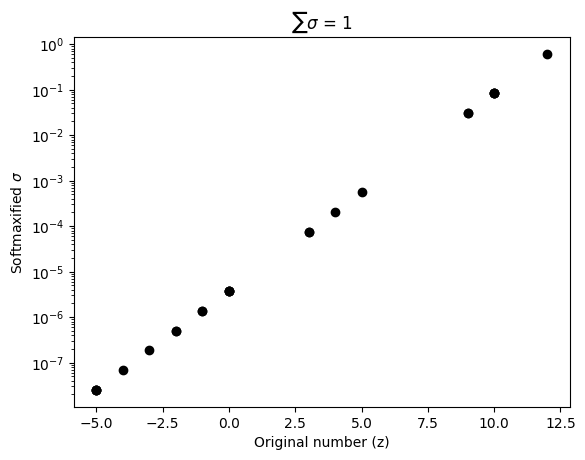

In [11]:
z = np.random.randint(-5, high = 15, size = 25)
print(z)

num = np.exp(z)
den = np.sum( num )
sigma = num / den

plt.plot(z, sigma, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

tensor([3.7409e-06, 5.0628e-07, 2.5206e-08, 8.2399e-02, 2.5206e-08, 2.5206e-08,
        3.7409e-06, 6.8517e-08, 8.2399e-02, 8.2399e-02, 5.5520e-04, 7.5138e-05,
        3.7409e-06, 1.3762e-06, 2.5206e-08, 1.8625e-07, 5.0628e-07, 1.3762e-06,
        3.0313e-02, 3.0313e-02, 7.5138e-05, 3.7409e-06, 2.0425e-04, 6.0885e-01,
        8.2399e-02])


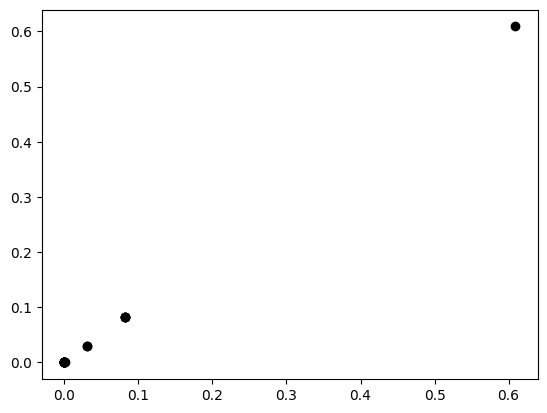

In [13]:
softfun = nn.Softmax(dim = 0)

sigmaT = softfun( torch.Tensor(z) )

print(sigmaT)

plt.plot(sigma, sigmaT, 'ko')

Logs:

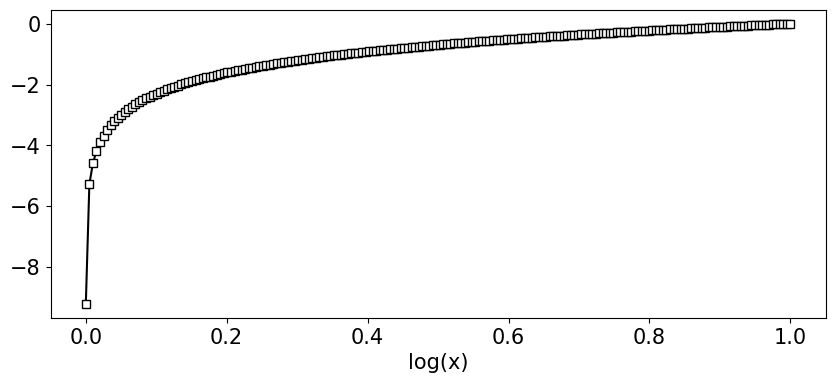

In [14]:
x = np.linspace(0.0001, 1, 200)

#compute log
logx = np.log(x)

#plot
fig = plt.figure(figsize = (10, 4))

# increase font size
plt.rcParams.update({'font.size' : 15})
plt.plot(x, logx, 'ks-', markerfacecolor = 'w')
plt.xlabel('x')
plt.xlabel('log(x)')
plt.show()

**ENTROPY AND CROSS** **ENTROPY**

In [15]:
p = 0.25

H = -( p*np.log(p) )
print('Wrong entropy: ' + str(H)) #wrong because we also need to calculate for values of 1-p

Wrong entropy: 0.34657359027997264


In [17]:
p = 0.25
q = 1-p
x = [p, q]
H = 0
for p in x:
  H -= ( p*np.log(p) )
print('correct entropy: ' + str(H))

correct entropy: 0.5623351446188083


In [18]:
# Also correct, written out for N = 2 events

#Binary Cross-Entropy

H = -( p*np.log(p) + (1-p)*np.log(1-p) ) # Ex: this picture is a cat or not a cat
print('Correct Entropy: ' + str(H))

Correct Entropy: 0.5623351446188083


In [20]:
# note: All probs must sum to 1!
p = [1, 0]     #sum = 1
q = [.25, .74] #sum = 1

H = 0
for i in range(len(p)):
  H -= p[i]*np.log(q[i])

print('Cross Entropy: ' + str(H))

Cross Entropy: 1.3862943611198906


In [21]:
#aslo correct, writte out for N = 2 events
H = -( p[0]*np.log(q[0]) + p[1]*np.log(q[1]) )
print('Correct entropy: ' + str(H))

#simplification
H = -np.log(q[0])
print('Manually simplified: ', str(H))

Correct entropy: 1.3862943611198906
Manually simplified:  1.3862943611198906


Using PyTorch

In [25]:
q_tensor = torch.Tensor(q)
p_tensor = torch.Tensor(p)

F.binary_cross_entropy(q_tensor, p_tensor)

tensor(1.3667)